## Create a database

In [1]:
import pandas as pd

In [2]:
df01 = pd.read_json('EBA.txt', lines = True)

In [3]:
df01.shape

(742, 14)

In [4]:
df01.head(1)

,category_id,childseries,data,description,end,f,geoset_id,last_updated,name,notes,parent_category_id,series_id,start,units
0,NaN,NaN,"[[20190101T08Z, 19], [20190101T07Z, 17], [2019...",Timestamps follow the ISO8601 standard (https:...,20190101T08Z,H,EBA.ID.H,2018-01-22T14:06:26-05:00,Actual Net Interchange for Imperial Irrigation...,NaN,NaN,EBA.IID-AZPS.ID.H,20150701T00Z,megawatthours


In [5]:
len(df01.loc[0, 'data'])

20497

In [6]:
demand_index = df01.name.apply(lambda x: 'Demand' in x)

In [10]:
df02 = df01.loc[demand_index, :]

In [11]:
df02.shape

(69, 14)

In [12]:
df02.name

3                    Demand for Florida (region), Hourly
7               Demand for Mid-Atlantic (region), Hourly
11                   Demand for Midwest (region), Hourly
15     Demand for United States Lower 48 (region), Ho...
19                   Demand for Central (region), Hourly
23                 Demand for Northwest (region), Hourly
27                 Demand for Southeast (region), Hourly
31                 Demand for Southwest (region), Hourly
35                Demand for California (region), Hourly
39                 Demand for Carolinas (region), Hourly
43       Demand for Tampa Electric Company (TEC), Hourly
44     Demand for PUD No. 1 of Douglas County (DOPD),...
45     Demand for Electric Reliability Council of Tex...
46     Demand for Tennessee Valley Authority (TVA), H...
47       Demand for Tucson Electric Power (TEPC), Hourly
48     Demand for Southern Company Services, Inc. - T...
49     Demand for Seminole Electric Cooperative (SEC)...
50     Demand for New York Inde

In [30]:
def select_ba(df, ba_index):
    df_ba = pd.DataFrame(df.loc[ba_index, 'data'], columns = ['time_stamp', 'demand'])
    df_ba.loc[:, 'time_stamp'] = df_ba.time_stamp.apply(lambda x: pd.to_datetime(x))
    return df_ba

In [31]:
df_ba_ercot = select_ba(df01, 45)

In [32]:
df_ba_ercot.head()

,time_stamp,demand
0,2018-01-22 18:00:00,37894.0
1,2018-01-22 17:00:00,38402.0
2,2018-01-22 16:00:00,38645.0
3,2018-01-22 15:00:00,39107.0
4,2018-01-22 14:00:00,39627.0


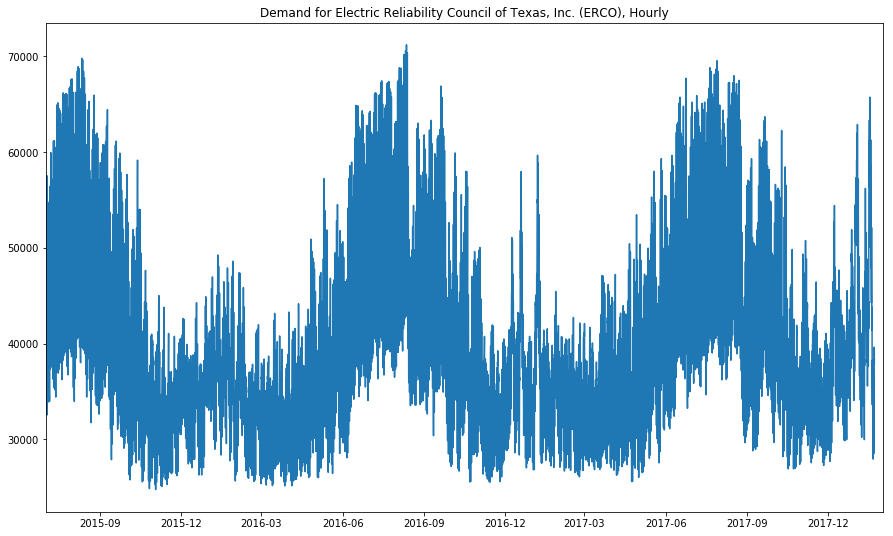

In [39]:
fig, ax = plt.subplots(figsize = (15, 9))
ax.plot(df_ba_ercot.time_stamp, df_ba_ercot.demand);
ax.set_xlim(pd.datetime(2015,7,1), pd.datetime(2018,2,1));
ax.set_title(df01.loc[45, 'name']);

In [40]:
df_ba_scl = select_ba(df01, 53)

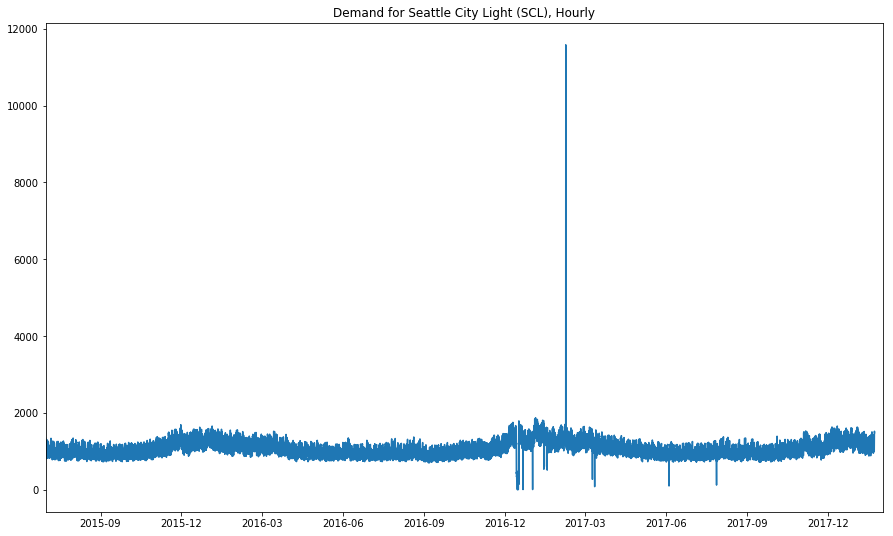

In [41]:
fig, ax = plt.subplots(figsize = (15, 9))
ax.plot(df_ba_scl.time_stamp, df_ba_scl.demand)
ax.set_xlim(pd.datetime(2015,7,1), pd.datetime(2018,2,1));
ax.set_title(df02.loc[53, 'name'])

In [42]:
df_ba_scl.to_csv('SCL_op.csv', index = False)

In [43]:
df_ba_ercot.to_csv('ERCOT_op.csv', index = False)